<a href="https://colab.research.google.com/github/FraGoTe/redes-neuronales/blob/master/TransferLearningInceptionOwnClasifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MODELOS DE RNA PRE-ENTRENADOS - Transfer Learning - Imágenes Médicas

In [1]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

1.15.0



##Carga de datos
---

Descargando archivos:

In [2]:
%%bash

if [ ! -d "dataset" ]; then
    wget --load-cookies /tmp/cookies.txt \
    "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt \
    --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1NX8reXkY8IuN58tBixe4tNKYW06rXeis' -O- | \
    sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1NX8reXkY8IuN58tBixe4tNKYW06rXeis" -O data.zip && rm -rf /tmp/cookies.txt

    unzip data.zip
fi


Archive:  data.zip
  inflating: dataset/test/abdomen/PMC2584007_1752-1947-2-335-2 (1).png  
  inflating: dataset/samples/img1.png  
  inflating: dataset/samples/img2.png  
  inflating: dataset/test/torax/17_IM-0460-2001_invert.png  
  inflating: dataset/test/abdomen/openI_22.png  
  inflating: dataset/samples/img3.jpg  
  inflating: dataset/test/abdomen/PMC2584007_1752-1947-2-335-2.png  
  inflating: dataset/test/abdomen/openI_20.png  
  inflating: dataset/test/abdomen/openI_21.png  
  inflating: dataset/test/torax/12_IM-0133-1001_invert.png  
  inflating: dataset/test/torax/20_IM-0653-1001.png  
  inflating: dataset/test/torax/8_IM-2333-1001.png  
  inflating: dataset/train/abdomen/openI_2.png  
  inflating: dataset/train/abdomen/openI_7.png  
  inflating: dataset/train/abdomen/openI_4.png  
  inflating: dataset/train/abdomen/openI_3.png  
  inflating: dataset/train/abdomen/PMC3736546_CRIM.SURGERY2013-359871.001.png  
  inflating: dataset/train/abdomen/PMC3913410_umj0082-0179-f4.png  

--2019-11-27 00:40:04--  https://docs.google.com/uc?export=download&confirm=&id=1NX8reXkY8IuN58tBixe4tNKYW06rXeis
Resolving docs.google.com (docs.google.com)... 74.125.206.138, 74.125.206.113, 74.125.206.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.206.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-3o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tsv970gl9d3ca7rossqrj6s4j57h5817/1574812800000/10010295392457947479/*/1NX8reXkY8IuN58tBixe4tNKYW06rXeis?e=download [following]
--2019-11-27 00:40:07--  https://doc-0g-3o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tsv970gl9d3ca7rossqrj6s4j57h5817/1574812800000/10010295392457947479/*/1NX8reXkY8IuN58tBixe4tNKYW06rXeis?e=download
Resolving doc-0g-3o-docs.googleusercontent.com (doc-0g-3o-docs.googleusercontent.com)... 74.125.140.132, 2a00:1450:400c:c08::84
Connecting to doc-0g-3o-docs.googleusercontent.com (do

Mostrando lista de archivos:

In [3]:
%%bash
ls -l

total 13916
drwxr-xr-x 5 root root     4096 Nov 27 00:40 dataset
-rw-r--r-- 1 root root 14238698 Nov 27 00:40 data.zip
drwxr-xr-x 1 root root     4096 Nov 21 16:30 sample_data


## VISUALIZACION DE DATA
---

Using TensorFlow backend.


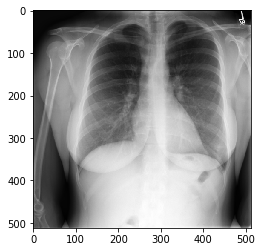

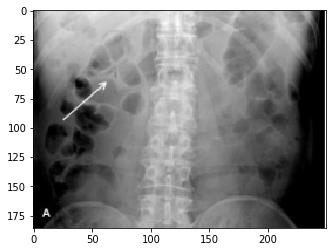

In [4]:
# Cargando dataset, redimensionando y guardando archivos
from keras.preprocessing.image import load_img

main_path = "/content/"
# Folders
path_torax = "".join([main_path,"dataset/train/torax/42_IM-2063-1001.png"])
path_abdomen = "".join([main_path,"dataset/train/abdomen/openI_1.png"])

# Mostrar las imágenes de nuestro dataset
import matplotlib.pyplot as plt
img_rx_torax = load_img(path_torax)
img_rx_abdomen = load_img(path_abdomen)

plt.imshow(img_rx_torax)
plt.show()
plt.imshow(img_rx_abdomen)
plt.show()


 ## PARTE I - PREPROCESAMIENTO DE DATOS
---


In [5]:
from keras.preprocessing.image import ImageDataGenerator

# Dataset Folder
folder_main = "".join([main_path,"dataset"])

# Preprocesamiento de imágenes: Definiremos una dimensión de 300x300
img_width = 224
img_height = 224

print("\nDescripción de la data de training:")
# Generador de data
datagen = ImageDataGenerator( rescale = 1.0/255.0,
                              horizontal_flip = True)
# rescale: Normalizar valores [0-1] en lugar de [0-255]
# horizontal_flip: valor booleno. Voltea aleatoriamente las entradas horizontalmente.

training_set = datagen.flow_from_directory(folder_main + '/train',
                                                 target_size = (img_width, img_height),
                                                 batch_size = 1,
                                                 class_mode = 'binary')

print("\nDescripción de la data de testing:")
testing_set = datagen.flow_from_directory(folder_main + '/test',
                                                 target_size = (img_width, img_height),
                                                 batch_size = 1,
                                                 class_mode = 'binary')

num_imgs_training = len(training_set.filenames)
num_imgs_testing = len(testing_set.filenames)

print("\n")
print(training_set.class_indices)
print("Número de imágenes de entenamiento: ",num_imgs_training)
print("Número de imágenes de testing: ",num_imgs_testing)


Descripción de la data de training:
Found 65 images belonging to 2 classes.

Descripción de la data de testing:
Found 10 images belonging to 2 classes.


{'abdomen': 0, 'torax': 1}
Número de imágenes de entenamiento:  65
Número de imágenes de testing:  10


---
## PARTE II - CONSTRUYENDO LA RED NEURONAL CONVOLUCIONAL
---

In [6]:
# InceptionV3
from keras.applications import inception_v3

# Cargando modelo InceptionV3
# include_top=false (SIN clasificador)
inception_conv = inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3), input_tensor=None, pooling=None, classes=1000)
inception_conv.summary();














87916544/87910968 [==============================] - 3s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 111, 111, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 111, 111, 32) 0           batch_normalization_1[0][0]      
_________

In [7]:
# Freeze todas las capas de Convolución
for layer in inception_conv.layers[:]:
    layer.trainable = False

inception_conv.summary();

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 111, 111, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 111, 111, 32) 0           batch_normalization_1[0][0]      
_______________________________________________________________________________________

In [8]:
# Verificando que las capas convolucionales no sean "entrenables"
for layer in inception_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fc8639825c0> False
<keras.layers.convolutional.Conv2D object at 0x7fc8a27abb00> False
<keras.layers.normalization.BatchNormalization object at 0x7fc8a27abcc0> False
<keras.layers.core.Activation object at 0x7fc863206048> False
<keras.layers.convolutional.Conv2D object at 0x7fc86322f550> False
<keras.layers.normalization.BatchNormalization object at 0x7fc862a926a0> False
<keras.layers.core.Activation object at 0x7fc862a92c18> False
<keras.layers.convolutional.Conv2D object at 0x7fc862a9dfd0> False
<keras.layers.normalization.BatchNormalization object at 0x7fc862a54c88> False
<keras.layers.core.Activation object at 0x7fc862a5ceb8> False
<keras.layers.pooling.MaxPooling2D object at 0x7fc862a5cf98> False
<keras.layers.convolutional.Conv2D object at 0x7fc8629ff208> False
<keras.layers.normalization.BatchNormalization object at 0x7fc85011c4a8> False
<keras.layers.core.Activation object at 0x7fc862a1bcf8> False
<keras.layers.convolutional.Conv

Arquitectura de la Red Neuronal Artificial final:

In [41]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.optimizers import Adam

# Definiendo la ARQUITECTURA de la Red Neuronal Convolucional final
model = Sequential()

# Agregando la parte convolucional (base)
model.add(inception_conv)

# Clasificador
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten_4 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               6553728   
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 28,364,833
Trainable params: 6,562,049
Non-trainable params: 21,802,784
_________________________________________________________________


Entrenamiento:

In [42]:
# COMPILANDO la Red Neuronal Convolucional
#opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# ENTRENANDO la Red
import datetime
print('Iniciando a las: ', datetime.datetime.now())
print("...")

epochs=10
batch_size=2
history = model.fit_generator(training_set, steps_per_epoch=num_imgs_training/batch_size,
                              validation_data=testing_set,
                              validation_steps=num_imgs_testing/batch_size,
                              epochs=epochs)

print("...")
print('Terminando a las: ', datetime.datetime.now())


Iniciando a las:  2019-11-27 01:02:55.901870
...
Epoch 1/10
33/32 [==============================] - 20s 617ms/step - loss: 8.2127 - acc: 0.4848 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/10
33/32 [==============================] - 1s 32ms/step - loss: 7.2465 - acc: 0.5455 - val_loss: 3.1885 - val_acc: 0.8000
Epoch 3/10
33/32 [==============================] - 1s 31ms/step - loss: 6.7634 - acc: 0.5758 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 4/10
33/32 [==============================] - 1s 31ms/step - loss: 9.1789 - acc: 0.4242 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 5/10
33/32 [==============================] - 1s 32ms/step - loss: 6.7634 - acc: 0.5758 - val_loss: 3.1885 - val_acc: 0.8000
Epoch 6/10
33/32 [==============================] - 1s 32ms/step - loss: 9.1789 - acc: 0.4242 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 7/10
33/32 [==============================] - 1s 30ms/step - loss: 7.7296 - acc: 0.5152 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 8/10
33/32 [============

Graficando resultados:

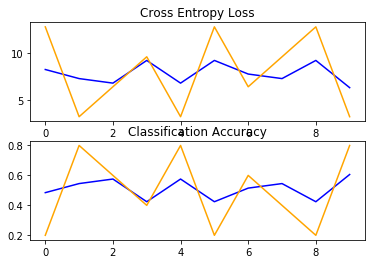

In [43]:
# GRAFICANDO resultados
import matplotlib.pyplot as plt
# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['acc'], color='blue', label='train')
plt.plot(history.history['val_acc'], color='orange', label='test')

---
## PARTE III - PREDICCIONES Y EVALUACIONES DE LA RED
---

In [44]:
# EVALUANDO la Red
acc = model.evaluate_generator(testing_set, num_imgs_testing/batch_size)
print('\nValidación:')
print('val_loss %.3f' % (acc[0] * 100.0))
print('val_acc %.3f' % (acc[1] * 100.0))


Validación:
val_loss 1275.391
val_acc 20.000


Guardango el modelo en Disco:

In [34]:
mkdir model

mkdir: cannot create directory ‘model’: File exists


In [45]:
# Guardar el modelo en disco
cnn_model_json = model.to_json()
with open("model/rx_model-vgg.json","w") as json_file:
  json_file.write(cnn_model_json)

model.save_weights("model/rx_model-vgg.h5")
print("Modelo guardado en disco ...")

Modelo guardado en disco ...


Predicción:

In [46]:
# Cargando modelo de disco
from keras.models import model_from_json
import numpy as np

json_file = open('model/rx_model-vgg.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model/rx_model-vgg.h5")
print("Modelo cargado de disco!")


Modelo cargado de disco!


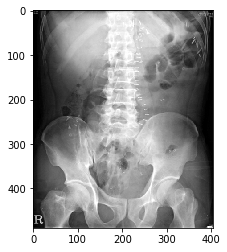

1.0  --> RX de Tórax


In [48]:
# Testing con una imagen
from keras.preprocessing import image
import matplotlib.pyplot as plt

test_image_path = 'dataset/samples/img1.png'
test_image = image.load_img(test_image_path)
plt.imshow(test_image)
plt.show()

test_image = image.load_img(test_image_path,target_size = (img_width, img_height))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)


result = loaded_model.predict(test_image)

if result[0][0] == 1:
    print(result[0][0], ' --> RX de Tórax')
else:
    print(result[0][0], ' --> RX de Abdomen')